In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [20]:
import pandas as pd
df = pd.DataFrame({'A': ['one', 'one', 'two', 'two', 'one'] ,
                   'B': ['Ar', 'Br', 'Cr', 'Ar','Ar'] ,
                   'C': ['04/26/2022', '04/25/2022', '08/30/2015', '07/3/1999','02/03/2022' ],
                      'D':[1,7,3,4,5]})
df


,A,B,C,D
0,one,Ar,04/26/2022,1
1,one,Br,04/25/2022,7
2,two,Cr,08/30/2015,3
3,two,Ar,07/3/1999,4
4,one,Ar,02/03/2022,5


In [413]:
from datetime import date
from datetime import datetime

def test(x):
    # for i,j,k,l in x.values:
    #     x['D'] = x['C'].day_of_year
    x['D'] = x['C'].dt.day_of_year
    return x

In [21]:
df = df.groupby('A', group_keys=True).apply(lambda x: x.sort_values('C', ascending=False)).reset_index(drop=True)
# xxx = df.groupby('A', group_keys=False).apply(test)
df

,A,B,C,D
0,one,Ar,04/26/2022,1
1,one,Br,04/25/2022,7
2,one,Ar,02/03/2022,5
3,two,Cr,08/30/2015,3
4,two,Ar,07/3/1999,4


# Start

In [155]:
action_df = pd.read_csv("dataset/actions.csv").dropna()
action_df.columns = ['account_id', 'book_id', 'creation_date']
action_df['creation_date'] = pd.to_datetime(action_df['creation_date']).dt.date
action_df

,account_id,book_id,creation_date
0,15548,9819,2022-01-02
1,10982,87139,2022-01-02
2,10982,87138,2022-01-02
3,10982,88465,2022-01-02
4,33041,68008,2022-01-02
...,...,...,...
1048570,46160,86053,2022-02-04
1048571,14652,26357,2022-02-04
1048572,71296,72107,2022-02-04
1048573,125340,115659,2022-02-04


In [156]:
action_df = action_df.groupby('account_id', group_keys=True).apply(lambda x: x.sort_values('creation_date', ascending=False)).reset_index(drop=True)

In [157]:
action_df = action_df[pd.to_datetime(action_df['creation_date']).dt.year == 2022]

In [158]:
action_df['score'] = 5
previous_id = None
previous_day = None
previous_idx = None
for index, row in action_df.iterrows():
    current_id = row['account_id']
    if previous_id != current_id:
        previous_idx = None
    current_day = pd.to_datetime(row['creation_date']).day_of_year
    if current_id == previous_id and current_day <= previous_day:
        if previous_idx == None:
            action_df.at[index, 'score'] = action_df.at[index, 'score'] - (previous_day-current_day)//29
        else:
            action_df.at[index, 'score'] = action_df.at[previous_idx, 'score'] - (previous_day-current_day)//29
        previous_idx = index
    previous_id = current_id
    previous_day = current_day

In [159]:
action_df.to_csv('dataset/action-pre.csv', index=False)

## Pre-process

In [160]:
action_df = pd.read_csv("dataset/action-pre.csv").dropna()
action_df

,account_id,book_id,creation_date,score
0,0,101254,2022-03-20,5
1,0,110668,2022-01-21,3
2,1,120582,2022-04-26,5
3,1,111497,2022-03-18,4
4,1,110483,2022-02-24,4
...,...,...,...,...
1046128,149086,54928,2022-04-26,5
1046129,149087,93140,2022-04-26,5
1046130,149088,77549,2022-04-26,5
1046131,149089,15114,2022-04-26,5


In [163]:
# book_df = pd.read_csv("dataset/book_data.csv").fillna(value=0)
book_df = pd.read_csv("dataset/book_data.csv").dropna()
book_df

,book_id,title,description,price,number_of_page,PhysicalPrice,publishDate,rating,publisher,categories,author_name,translator_name,lang
0,100,هفت گام برای شروع موفق یک کسب و کار,داشتن کسب‌وکاری مستقل، برای بسیاری به‌ویژه جوا...,2000,76,0,1390/05/01,2.600000,انتشارات سازمان مدیریت صنعتی,مدیریت و کسب و کار,نعیم ظفر,محسن؛ سحر حاجیانی؛ بحریه,En
1,104,صدف نبوت 4,مجموعه اشعار مناسبت های ایام فاطمیه ،ماه های ج...,5000,128,0,1390/01/14,5.000000,هلال,شعر کهن,غلامرضا سازگار,جواد زهتاب,En
2,107,مرآت ولایت ۲,مجموعه شعر آیینی- شیعی مرآت ولایت نوشته غلامرض...,5000,193,0,1388/03/02,5.000000,موسسه هلال,کلیات اسلام,غلامرضا سازگار,مسعود اسماعیلی,En
3,108,مرآت ولایت ۳,مجموعه شعر آیینی- شیعی مرآت ولایت نوشته غلامرض...,5000,203,0,1389/02/11,5.000000,موسسه هلال,شعر معاصر,غلامرضا سازگار,محمّدسعید میرزایی,En
4,109,مرآت ولایت ۴,مجموعه شعر آیینی- شیعی مرآت ولایت نوشته غلامرض...,5000,192,0,1390/01/25,5.000000,موسسه هلال,شعر معاصر,غلامرضا سازگار,محمّدسعید میرزایی,En
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15656,45328,نویسنده‌شدن,«نویسنده شدن» کتابی درباره نویسندگی و اثر دروت...,7500,144,14000,1395/10/17,3.111111,بنگاه ترجمه و نشر کتاب پارسه,پژوهش ادبی,دروتیا برند,آرش محمداولی,En
15658,45331,هیپی؛ داستان دوره‌ای از زندگی شخصی نویسنده درب...,«هیپی» کتابی از نویسنده توانای برزیلی، پائولو ...,13300,272,29500,1397/10/10,3.250000,بنگاه ترجمه و نشر کتاب پارسه,خاطرات,پائولو کوئیلو,مهدی آقامحمد زنجانی,En
15694,45422,یادداشت‌های امیراسدالله علم؛ دفتر اول,کتاب هفت جلدی «یادداشت‌های امیر اسدالله علم» د...,40000,1027,315000,1394/10/16,4.636364,انتشارات مازیار,تاریخ معاصر ایران,اسدالله علم,علینقی عالیخانی,En
15695,45424,یادداشت‌های امیراسدالله علم؛ دفتر دوم,کتاب هفت جلدی «یادداشت‌های امیر اسدالله علم» د...,40000,1078,315000,1394/10/13,3.714286,انتشارات مازیار,تاریخ معاصر ایران,اسدالله علم,علینقی عالیخانی,En


In [167]:
merge_df = action_df.merge(book_df, on='book_id', how='inner')

In [173]:
merge_df['rating_count'] = merge_df.groupby('account_id')['book_id'].transform('count')
merge_df

,account_id,book_id,creation_date,score,title,description,price,number_of_page,PhysicalPrice,publishDate,rating,publisher,categories,author_name,translator_name,lang,rating_count,rating_mean
0,1,37715,2022-02-24,4,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,2,4.0
1,295,37715,2022-02-25,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,30,5.0
2,1023,37715,2022-02-24,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,16,5.0
3,1377,37715,2022-02-26,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,14,5.0
4,6530,37715,2022-02-25,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,48,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149439,144968,10888,2022-04-15,5,جنگ ستارگان (جلد اول: قسمت دوم),کمیک (داستان مصور) جنگ ستارگان، جلد اول (قسمت ...,0,201,0,1395/04/24,4.733333,کمیک‌دونی,کمیک,هونگ جاک گا,خاطره کیانی,En,10,5.0
149440,145638,18523,2022-04-19,5,قند و پند,مجموعه داستانک های پندآموز دو زبانه ویژه نوجوا...,10000,86,0,1395/10/11,4.222222,انتشارات پشتیبان,داستان کودک و نوجوانان,سمیرا لطفی نوکنده,خلیل قربانی,En,20,5.0
149441,146096,15308,2022-04-18,5,ابزارها و شیوه‌های جنگ نرم,«ابزارها و شیوه‌های جنگ نرم» نوشته محمدرضا نای...,10000,60,0,1395/04/06,5.000000,انتشارات پشتیبان,جامعه‌شناسی,جابر پوریانی,مهدی فرجادکیا,En,1,5.0
149442,146213,32720,2022-04-18,5,پیتر پن,«پیتر پن» شخصیتی داستانی است که توسط نویسنده ا...,3000,0,0,1396/07/02,5.000000,آوا رسا,داستان کودک و نوجوانان,آرزو رمضانی,عاطفه مولایی طبری,En,1,5.0


In [174]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
feature_encodings = tokenizer(merge_df['categories'].tolist(), truncation=True, padding=True, max_length=64)


In [178]:
data_df = pd.concat([merge_df[['account_id', 'book_id','creation_date', 'score', 'price', 'number_of_page',
                    'PhysicalPrice', 'rating', 'rating_count', ]],
                    pd.DataFrame(feature_encodings['input_ids'])], axis=1)

In [179]:
data_df

,account_id,book_id,creation_date,score,price,number_of_page,PhysicalPrice,rating,rating_count,0,1,2,3,4,5,6,7,8
0,1,37715,2022-02-24,4,10800,174,18000,3.500000,2,2,8212,4,0,0,0,0,0,0
1,295,37715,2022-02-25,5,10800,174,18000,3.500000,30,2,8212,4,0,0,0,0,0,0
2,1023,37715,2022-02-24,5,10800,174,18000,3.500000,16,2,8212,4,0,0,0,0,0,0
3,1377,37715,2022-02-26,5,10800,174,18000,3.500000,14,2,8212,4,0,0,0,0,0,0
4,6530,37715,2022-02-25,5,10800,174,18000,3.500000,48,2,8212,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149439,144968,10888,2022-04-15,5,0,201,0,4.733333,10,2,28653,4,0,0,0,0,0,0
149440,145638,18523,2022-04-19,5,10000,86,0,4.222222,20,2,4556,3951,331,6547,4,0,0,0
149441,146096,15308,2022-04-18,5,10000,60,0,5.000000,1,2,18200,4,0,0,0,0,0,0
149442,146213,32720,2022-04-18,5,3000,0,0,5.000000,1,2,4556,3951,331,6547,4,0,0,0


In [181]:
train, test = train_test_split(data_df, test_size=0.2, random_state=42)
train = train.sort_values('account_id').reset_index(drop=True)
test = test.sort_values('account_id').reset_index(drop=True)

In [182]:
train_query = train['account_id'].value_counts().sort_index()
test_query = test['account_id'].value_counts().sort_index()

In [183]:
features = [i for i in train.columns.to_list() if i not in ['account_id','book_id','creation_date','score'] ]
target = 'score'

In [184]:
import xgboost as xgb
model = xgb.XGBRanker(objective='rank:ndcg', n_estimators=20, random_state=0,learning_rate=0.1)
model.fit(
    train[features],
    train[target],
    group=train_query,
    eval_metric='ndcg',
    eval_set=[(test[features], test[target])],
    eval_group=[list(test_query)],
    verbose =True
)

# model.fit(ratings[['account_id','book_id']], ratings['rating'], group=ratings['count'].to_list(), verbose=True)

[0]	validation_0-ndcg:0.99745


/home/abolfazl/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-ndcg:0.99727
[2]	validation_0-ndcg:0.99736
[3]	validation_0-ndcg:0.99736
[4]	validation_0-ndcg:0.99738
[5]	validation_0-ndcg:0.99739
[6]	validation_0-ndcg:0.99742
[7]	validation_0-ndcg:0.99740
[8]	validation_0-ndcg:0.99741
[9]	validation_0-ndcg:0.99742
[10]	validation_0-ndcg:0.99741
[11]	validation_0-ndcg:0.99741
[12]	validation_0-ndcg:0.99736
[13]	validation_0-ndcg:0.99739
[14]	validation_0-ndcg:0.99737
[15]	validation_0-ndcg:0.99740
[16]	validation_0-ndcg:0.99735
[17]	validation_0-ndcg:0.99730
[18]	validation_0-ndcg:0.99734
[19]	validation_0-ndcg:0.99733


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=20, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [185]:
preds = model.predict(test.iloc[:10][features])
topk_idx = np.argsort(preds)[::-1][:5]
topk_idx

array([1, 8, 4, 9, 6])

Text(0.5, 1.0, 'feature importance')

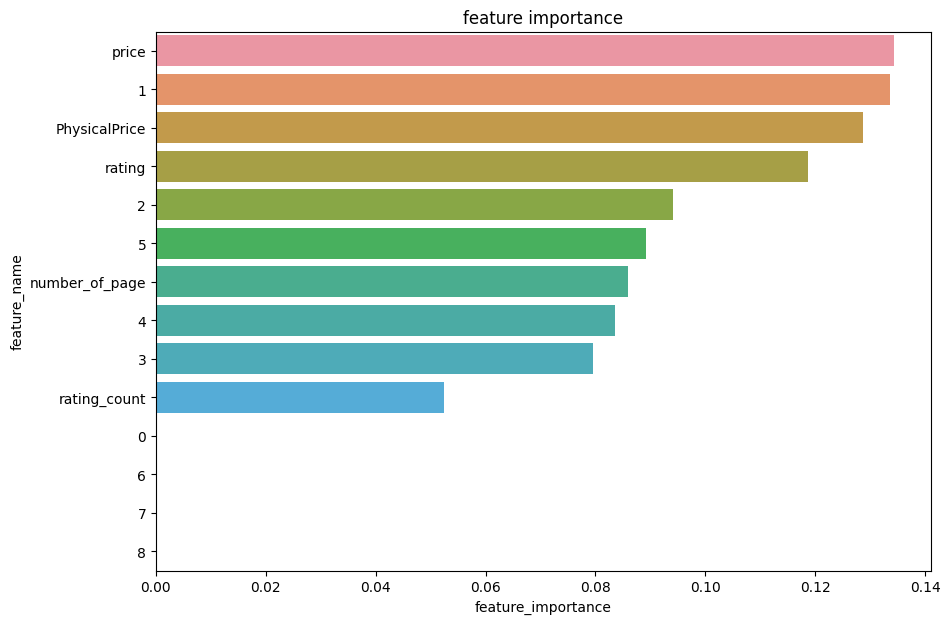

In [186]:
# feature imporance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
df_plt = pd.DataFrame({'feature_name': features, 'feature_importance': model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt)
plt.title('feature importance')

In [224]:
def preProcess(df):
    df['rating_count'] = df.groupby('account_id')['book_id'].transform('count')
    feature_encodings = tokenizer(df['categories'].tolist(), truncation=True, padding=True, max_length=64)
    data_df = pd.concat([df[['account_id', 'book_id', 'price', 'number_of_page',
                    'PhysicalPrice', 'rating', 'rating_count']],
                    pd.DataFrame(feature_encodings['input_ids'])], axis=1)
    
    fill_mat = pd.DataFrame(np.zeros((data_df.shape[0], 16 - data_df.shape[1]), dtype=np.int16), columns=range(data_df.shape[1]-7,9))    
    return pd.concat([data_df, fill_mat], axis=1)

In [287]:
user_id = 1234
book_list = [80387, 8213, 5331, 12439, 119985, 3619,37715]
data = pd.DataFrame({'account_id': [user_id] * len(book_list),
                     'book_id': book_list})
merge = data.merge(book_df, on='book_id', how='inner')
pred_df = preProcess(merge)
pred_df

,account_id,book_id,price,number_of_page,PhysicalPrice,rating,rating_count,0,1,2,3,4,5,6,7,8
0,1234,8213,8000,239,18000,2.963235,4,2,18200,4,0,0,0,0,0,0
1,1234,5331,9800,607,0,4.290598,4,2,8212,4,0,0,0,0,0,0
2,1234,3619,8000,198,25000,3.000000,4,2,7854,6318,300,15985,22545,331,4648,4
3,1234,37715,10800,174,18000,3.500000,4,2,8212,4,0,0,0,0,0,0


In [265]:
action_df.query('account_id==@user_id')

,account_id,book_id,creation_date,score
14039,1234,80387,2022-04-23,5
14040,1234,8213,2022-04-23,5
14041,1234,63025,2022-04-23,5
14042,1234,12800,2022-04-23,5
14043,1234,12439,2022-04-23,5
14044,1234,15986,2022-04-23,5
14045,1234,120342,2022-04-23,5
14046,1234,119985,2022-04-23,5
14047,1234,69380,2022-04-23,5
14048,1234,97166,2022-04-21,5


In [286]:
np.square(np.sum(preds))/3

0.7995221614837646

In [283]:
preds

array([0.24095392, 0.522945  , 0.7848317 ], dtype=float32)

In [292]:
preds = np.abs(model.predict(pred_df[features]))
prob_scores = 1.0 - (preds / np.max(preds))
topk_idx = np.argsort(prob_scores)[::-1][:4]
recommend_df = pred_df.loc[topk_idx].reset_index(drop=True)

# check recommend
recom = []
print('---------- Recommend ----------')
for i, row in recommend_df.iterrows():
    recom.append({"rank":i+1,
                "book":book_df[book_df["book_id"] == row["book_id"]].to_dict(orient='records'),
                "score":prob_scores[topk_idx][i] })

---------- Recommend ----------


In [293]:
recom

[{'rank': 1,
  'book': [{'book_id': 8213,
    'title': 'بی\u200cشعوری بس است دیگر! (جلد اول)',
    'description': 'خاویر کرمنت، نویسنده و پژوهشگر است و به سبب نگارش سه\u200cگانه «بی\u200cشعوری» به شهرت رسید.\r\n«بی\u200cشعوری بس است دیگر! کتابی برای همه\u200cکس و هیچ\u200cکس» نخستین کتاب از این سه\u200cگانه است که در ایران با استقبال بسیاری رو به\u200cرو شده است.\r\nدو کتاب دیگر به ترتیب «بی\u200cشعوری: تا همیشه» و «بیشعوری: توطئه بی\u200cشعوری» نام داردکه به\u200cزودی در طاقچه قرار می\u200cگیرد.\r\nدر بخشی از کتاب به نام «بی\u200cشعوریسم» می\u200cخوانیم:\r\n«جذب و استخدام بی\u200cشعورها در هر کشوری بخشی از فعالیت\u200cهای دولت مرکزی است. دلیلش هم خیلی ساده است. دولت قدرت عمل زیادی در شکل\u200cدهی روش زندگی ما دارد و بی\u200cشعورها هم بدشان نمی\u200cآید از قدرت؛ مخصوصا قدرتی که با آن بشود به دیگران گفت «بخوان و بنویس» تا از این طریق این آدم\u200cها را بتوان به استخدام دولت درآورد. \r\nدولت از دو بخش بزرگ تشکیل می\u200cشود: اول سیاستمدارها؛ یعنی صاحب\u200cمنصب\u200cهای منتخب ما که فکر م

# Appendix

In [67]:
merged_df = pd.merge(action_df, book_df, on='book_id', how='inner')
# merged_df

In [81]:
features = merged_df.drop(['account_id', 'book_id', 'creation_date', 'rating',
                            'title', 'description', 'publishDate', 'publisher', 'categories', 'author_name', 'translator_name', 'lang'], axis=1)  # Input features
target = merged_df['rating']  # Output variable

In [82]:
features

,price,number_of_page,PhysicalPrice
0,1500,88,0
1,1500,88,0
2,1500,88,0
3,1500,88,0
4,1500,88,0
...,...,...,...
149872,5000,302,15000
149873,8000,232,15999
149874,1800,89,4500
149875,4200,160,11500


In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9347435057418546


## XGBOOST

In [135]:
import matplotlib.pyplot as plt


In [186]:
ratings = action_df.merge(book_df, how='inner', on='book_id')[['account_id','book_id', 'rating']]
ratings

,account_id,book_id,rating
0,15548,2199,3.625000
1,64824,2199,3.625000
2,55282,2199,3.625000
3,38633,2199,3.625000
4,49608,2199,3.625000
...,...,...,...
149872,32989,9078,4.000000
149873,1331,29260,5.000000
149874,122956,17115,4.222222
149875,69621,24644,4.000000


In [187]:
X_train, X_test, y_train, y_test = train_test_split(ratings[['account_id','book_id']], ratings['rating'], test_size=0.2, random_state=42)

In [200]:
group_train = X_train.groupby('account_id').size().to_frame('size')['size'].to_numpy()
group_test = X_test.groupby('account_id').size().to_frame('size')['size'].to_numpy()

In [167]:
# ratings = action_df.merge(book_df, how='inner', on='book_id')[['account_id','book_id', 'rating']]
# unique_relations = ratings.groupby('account_id').size().reset_index().rename(columns={0: 'count'})
# ratings = ratings.merge(unique_relations, on=['account_id'], how='left')
# ratings

,account_id,book_id,rating,count
0,15548,2199,3.625000,19
1,64824,2199,3.625000,7
2,55282,2199,3.625000,11
3,38633,2199,3.625000,53
4,49608,2199,3.625000,3
...,...,...,...,...
149872,32989,9078,4.000000,30
149873,1331,29260,5.000000,2
149874,122956,17115,4.222222,54
149875,69621,24644,4.000000,67


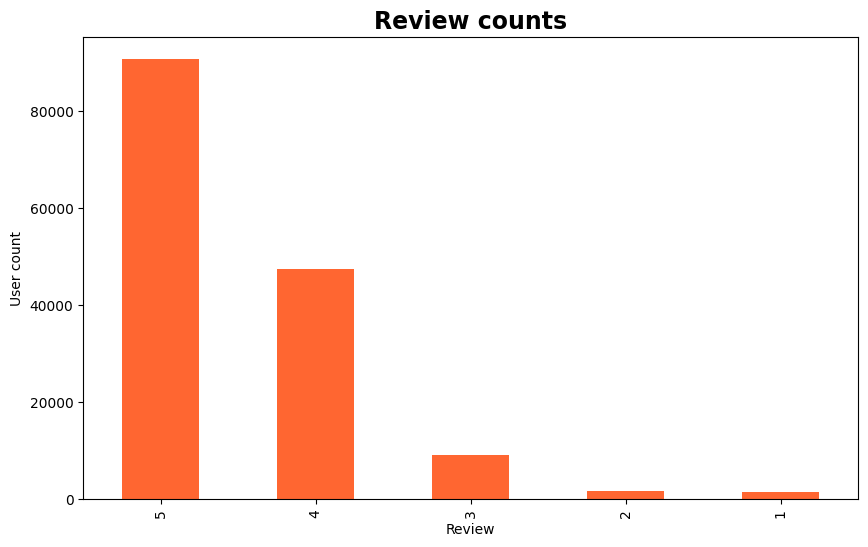

In [168]:
ratings.rating.apply(lambda x:int(np.ceil(x))).value_counts().plot.bar(figsize=(10,6),color='#FF6631')
plt.title("Review counts",fontweight='bold',fontsize=17)
plt.xlabel("Review")
plt.ylabel("User count")
plt.show()

In [203]:
X_train

,account_id,book_id
65103,10622,12551
139835,6157,32855
85020,122469,17021
90601,113593,19426
39108,72724,22379
...,...,...
119879,40023,39044
103694,125934,32897
131932,37525,28140
146867,42550,5611


In [226]:
import xgboost as xgb
model = xgb.XGBRanker(objective='rank:ndcg', n_estimators=2, random_state=0,learning_rate=0.1)
model.fit(
    X_train,
    y_train,
    group=[list(group_train)],
    eval_metric='ndcg',
    eval_set=[(X_test, y_test)],
    eval_group=[list(group_test)],
    verbose =True
)

# model.fit(ratings[['account_id','book_id']], ratings['rating'], group=ratings['count'].to_list(), verbose=True)

/home/abolfazl/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-ndcg:0.98633
[1]	validation_0-ndcg:0.98674


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=2, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [214]:
X_train.head(1)

,account_id,book_id
65103,10622,12551


In [232]:
model.predict(pd.DataFrame([[15548, 210099]], columns=['account_id', 'book_id']))

array([0.62036145], dtype=float32)

In [ ]:
15548	2199	3.625000	19

In [216]:
pd.DataFrame([[15548, 2199]], columns=['account_id', 'book_id'])

,account_id,book_id
0,15548,2199
